In [2]:
import pandas as pd
from tqdm import tqdm
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_top10 = pd.read_csv('data/top_10_EB_data.csv', index_col=0)
df_top10   # NaN값 결측치 처리를 하지 않은 데이터

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_16296\4240951640.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_top10 = pd.read_csv('data/top_10_EB_data.csv', index_col=0)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,user_session_c,category_code_1,category_code_2,category_code_3,category_code_4,user_top_10
49,2019-11-01 00:00:19 UTC,view,26100002,2053013553887052089,NaN,sulu,51.48,520956879,88e782d0-cb8f-4b25-b09c-6dd9bce06832,3,NaN,NaN,NaN,NaN,1
224,2019-11-01 00:01:46 UTC,view,39700019,2084962304016777941,apparel.costume,NaN,136.43,516426931,b36a7084-888d-4e37-bad4-cec9cfb1fbce,4,apparel,NaN,costume,NaN,1
253,2019-11-01 00:02:02 UTC,view,1004873,2053013555631882655,electronics.smartphone,samsung,362.29,524356542,2f44a6ff-59aa-458c-acef-aee764d2ce10,24,electronics,NaN,smartphone,NaN,1
338,2019-11-01 00:02:36 UTC,view,5100816,2053013553375346967,NaN,xiaomi,29.58,524356542,2f44a6ff-59aa-458c-acef-aee764d2ce10,24,NaN,NaN,NaN,NaN,1
384,2019-11-01 00:02:56 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1665.36,562210838,a58d94c8-c0d4-4f24-bf3c-04c4e69ea153,13,electronics,NaN,smartphone,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62500962,2019-11-30 23:59:41 UTC,view,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,33,appliances,environment,vacuum,NaN,1
62500971,2019-11-30 23:59:43 UTC,view,1004836,2053013555631882655,electronics.smartphone,samsung,229.59,517876634,79428fc0-959b-4a17-8079-e11493c81f48,2,electronics,NaN,smartphone,NaN,1
62500973,2019-11-30 23:59:44 UTC,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,33,appliances,environment,vacuum,NaN,1
62500974,2019-11-30 23:59:44 UTC,purchase,26205399,2053013563693335403,NaN,NaN,179.16,553345124,58c692ff-c7a9-4e35-9ec4-58598f1940e0,16,NaN,NaN,NaN,NaN,1


In [5]:
df_top10_purchase = df_top10.query('event_type == "purchase"')
df_top10_purchase    # 구매내역을 기준으로 데이터 모음

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,user_session_c,category_code_1,category_code_2,category_code_3,category_code_4,user_top_10
639,2019-11-01 00:04:51 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,562958505,0f039697-fedc-40fa-8830-39c1a024351d,4,electronics,NaN,smartphone,NaN,1
855,2019-11-01 00:06:33 UTC,purchase,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e,25,electronics,video,tv,NaN,1
858,2019-11-01 00:06:34 UTC,purchase,5800823,2053013553945772349,electronics.audio.subwoofer,nakamichi,123.56,514166940,8ef5214a-86ad-4d0b-8df3-4280dd411b47,3,electronics,audio,subwoofer,NaN,1
1351,2019-11-01 00:10:12 UTC,purchase,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e,25,electronics,video,tv,NaN,1
1434,2019-11-01 00:10:47 UTC,purchase,1005124,2053013555631882655,electronics.smartphone,apple,1583.48,562210838,a58d94c8-c0d4-4f24-bf3c-04c4e69ea153,13,electronics,NaN,smartphone,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62500774,2019-11-30 23:58:08 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,574868869,878a1538-ebe3-4d7f-b773-1b057b1971eb,7,electronics,NaN,smartphone,NaN,1
62500783,2019-11-30 23:58:14 UTC,purchase,1004874,2053013555631882655,electronics.smartphone,samsung,346.70,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0,25,electronics,NaN,smartphone,NaN,1
62500800,2019-11-30 23:58:22 UTC,purchase,1005130,2053013555631882655,electronics.smartphone,apple,1437.02,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe,6,electronics,NaN,smartphone,NaN,1
62500906,2019-11-30 23:59:15 UTC,purchase,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,33,appliances,environment,vacuum,NaN,1


In [6]:
df_top10_value = df_top10_purchase['brand'].value_counts()  # 위에서 모은 데이터를 브랜드를 기준으로 unique value들 count한 것을 'df_top10_value' 변수에 지정

In [7]:
df_top10_value.describe()  # df_top10_value 변수의 통계량 확인

count      1587.000000
mean        168.419660
std        3126.829579
min           1.000000
25%           2.000000
50%           5.000000
75%          18.000000
max      104155.000000
Name: brand, dtype: float64

# 가장 많이 팔린 브랜드 상위 10개(주문 건수)

In [8]:
df_brand_top10 = df_top10_value.nlargest(10, keep='all')
df_brand_top10      # 브랜드 별 주문 건수가 가장 많은 순으로 상위 10개 기업을 'df_brand_top10' 변수에 지정

apple      104155
samsung     65773
xiaomi      15120
huawei       5882
lucente      5164
lg           4322
oppo         4048
sony         3758
acer         2789
lenovo       2379
Name: brand, dtype: int64

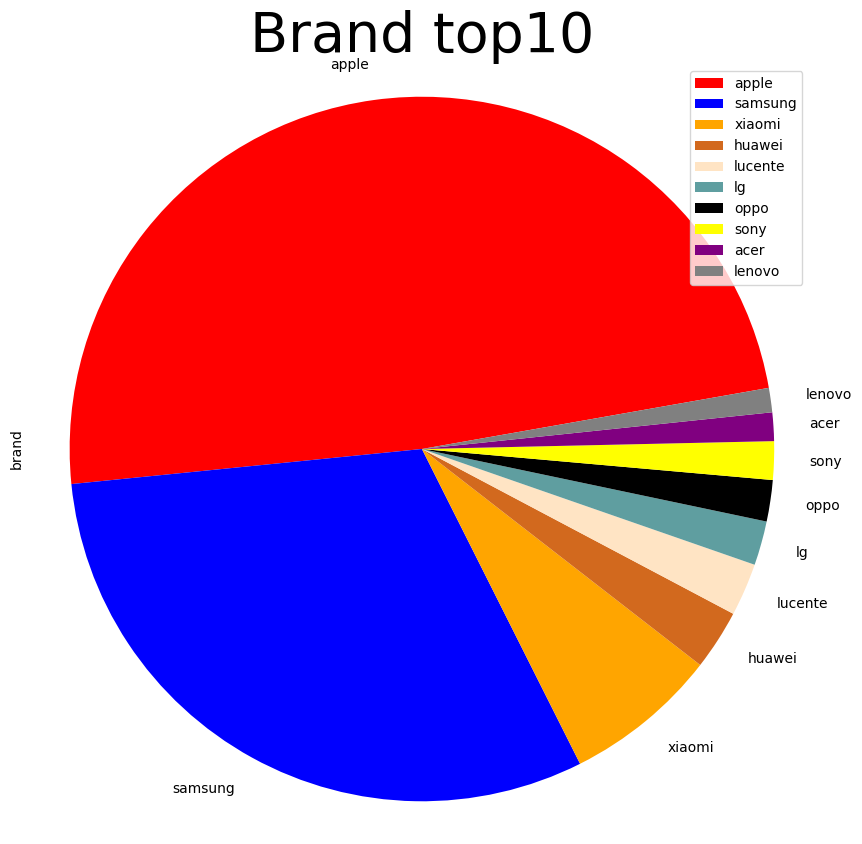

In [10]:
df_brand_top10.plot(kind='pie',
                        figsize=(10, 10),
                        startangle=10,
                        colors=['red','blue', 'orange', 'chocolate', 'bisque', 'cadetblue', 'black', 'yellow', 'purple', 'grey'])
plt.title('Brand top10', size=40)
plt.axis('equal')
plt.legend(df_brand_top10.index, loc='upper right')
plt.show()   # 주문 건수가 많은 상위 Brand top10 pie그래프로 시각화

# 가장 많은 매출을 올린 브랜드 상위10개 기업

In [11]:
total_sum = df_top10_purchase['price'].sum() # 구매내역을 기준으로 자료를 모은 변수를 다시 가격으로 정렬하고 합산한 결과를 'total sum'변수에 지정
total_sum

145478126.64999998

In [12]:
brand_sum = df_top10_purchase.groupby('brand').sum('price') # 브랜드별로 달성한 매출액 합산
brand_sum['price']

brand
a-case          258.23
a-mega           25.74
acer        1713363.79
achilles        222.40
acm              34.49
               ...    
zlatek           51.46
zotac          1665.66
zte            2061.27
zubr           2531.07
zuru             25.68
Name: price, Length: 1587, dtype: float64

In [13]:
sr_brand_total = brand_sum['price'].nlargest(10, keep='all') # 가장 큰 값을 가진 상위 10개 브랜드 정렬
sr_brand_total

brand
apple      91947069.07
samsung    23124202.03
xiaomi      2934678.43
lg          2174553.10
sony        1857953.72
acer        1713363.79
lucente     1431728.76
huawei      1390417.32
lenovo      1206600.89
oppo        1074227.96
Name: price, dtype: float64

In [14]:
df_total = pd.DataFrame(sr_brand_total)  # 위에서 만든 시리즈 객체를 데이터프레임 형식으로 'df_total'변수에 지정
df_total

,price
brand,
apple,91947069.07
samsung,23124202.03
xiaomi,2934678.43
lg,2174553.10
sony,1857953.72
acer,1713363.79
lucente,1431728.76
huawei,1390417.32
lenovo,1206600.89


In [15]:
df_total['brand'] = sr_brand_total.index       # df_total의 'brand'를 인덱스로 지정하고
df_total['price'] = sr_brand_total.to_list()   # 'price' 값들을 리스트에 저장

Text(0, 0.5, 'Total Price')

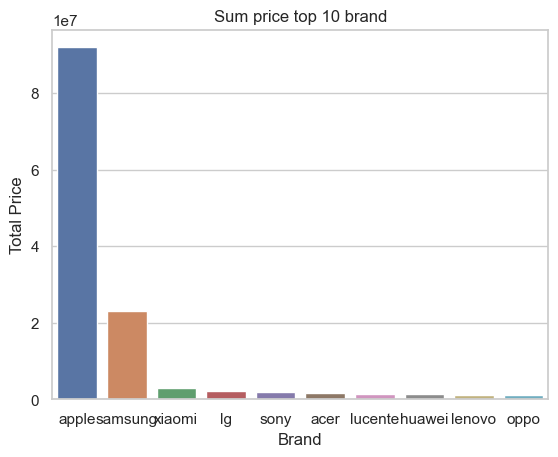

In [157]:
plt.figure()
sns.set_theme(style="whitegrid") 
ax = sns.barplot(data = df_total, x='brand', y='price')
ax.set_title('Sum price top 10 brand')
ax.set_xlabel('Brand')
ax.set_ylabel('Total Price')

# 가장 많은 event_type을 발생시키는 상위 10개 브랜드

In [27]:
df_top10['event_type'].value_counts()   # 'event_type' 기준으로 각 unique value들 count

view        2626336
cart         474725
purchase     282158
Name: event_type, dtype: int64

In [28]:
sr_type_brand = df_top10[['brand', 'event_type']].value_counts() # 'brand'들의 각 'event_type'의 수 표시 
sr_type_brand

brand               event_type
apple               view          623406
samsung             view          363181
apple               cart          175601
xiaomi              view          126009
samsung             cart          108374
                                   ...  
stikbot             cart               1
likatoprofessional  cart               1
avengers            view               1
likato              view               1
maxima              purchase           1
Length: 6772, dtype: int64

In [29]:
df_event_total = pd.DataFrame(sr_type_brand) # DataFrame
df_event_total

,,0
brand,event_type,
apple,view,623406
samsung,view,363181
apple,cart,175601
xiaomi,view,126009
samsung,cart,108374
...,...,...
stikbot,cart,1
likatoprofessional,cart,1
avengers,view,1


In [31]:
gr_type_brand = df_event_total.groupby('brand').sum(0) # 브랜드를 하나로 묶고 각 항목('event_type')들을 합산한 수를 'gr_type_brand'에 지정
gr_type_brand[0].head(50)

brand
a-case                   636
a-derma                    7
a-mega                    25
aardwolf                   7
absolutechampion           3
abtoys                     5
academie                   5
accord                     2
acd                        1
acer                   44225
aces                       4
achilles                  38
acm                       45
acme                    1123
acqua                      3
acron                      3
actiontrack                2
activision               182
acuvue                    83
acv                      133
acvilagrup                 3
adagio                    26
adam                      20
adamas                   410
adamex                   300
adata                    317
addlink                    1
adel                      11
adelline                  65
adidas                  1448
adil                    1048
adile                    109
admarginem                 1
admira                    22
adriatic

In [32]:
event_type_brand_total = gr_type_brand[0].nlargest(10, keep='all')
event_type_brand_total

brand
apple      903162
samsung    537328
xiaomi     167056
lucente     76175
huawei      58165
lg          55758
sony        47586
lenovo      45027
acer        44225
oppo        36710
Name: 0, dtype: int64

In [33]:
df_total1 = pd.DataFrame(event_type_brand_total)
df_total1

,0
brand,
apple,903162
samsung,537328
xiaomi,167056
lucente,76175
huawei,58165
lg,55758
sony,47586
lenovo,45027
acer,44225


In [34]:
df_total1['brand'] = event_type_brand_total.index
df_total1[0] = event_type_brand_total.to_list()

Text(0, 0.5, 'Behavior')

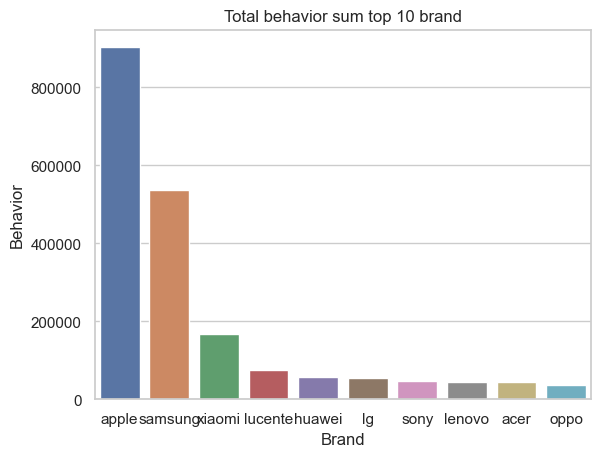

In [35]:
plt.figure()
sns.set_theme(style="whitegrid") 
ax = sns.barplot(data = df_total1, x='brand', y=0)
ax.set_title('Total behavior sum top 10 brand')
ax.set_xlabel('Brand')
ax.set_ylabel('Behavior')